In [1]:
function bisect(f, xl, xu, es, imax)
    iter = 0
    ea = 100

    xr_all = []
    xl_all = []
    xu_all = []
    ea_all = []

    if f(xl) * f(xu) > 0
        return NaN
    elseif f(xl) == 0
        return xl
    elseif f(xu) == 0
        return xu
    end

    xr = 0

    while ea > es && iter < imax
        xrold = xr
        xr = (xl + xu) / 2
        iter += 1

        if xr != 0
            ea = abs((xr - xrold) / xr) * 100
        end

        test = f(xl) * f(xr)

        if test < 0
            xu = xr
        elseif test > 0
            xl = xr
        else
            ea = 0
        end

        append!(xr_all, xr)
        append!(xl_all, xl)
        append!(xu_all, xu)
        append!(ea_all, ea)
    end

    return xr, iter, xr_all, xl_all, xu_all, ea_all
end

bisect (generic function with 1 method)

In [2]:
function test_1(x)
    return x^2 - 1
end

test_1 (generic function with 1 method)

In [3]:
(xr_bi, iter_bi, xr_all, xl_all, xu_all_bi, ea_all_bi) = bisect(test_1, 0, 1.3, 0.01, 10000)
println("xr = ", xr_bi)
println("iter = ", iter_bi)

xr = 0.9999938964843751
iter = 14


In [4]:
function false_position(f, xl, xu, es, imax)
    iter = 0
    ea = 100

    xr_all = []
    xl_all = []
    xu_all = []
    ea_all = []

    if f(xl) * f(xu) > 0
        return NaN
    elseif f(xl) == 0
        return xl
    elseif f(xu) == 0
        return xu
    end

    xr = 0

    while ea > es && iter < imax
        xrold = xr
        xr = xu - (f(xu) * (xl - xu)) / (f(xl) - f(xu))
        iter += 1

        if xr != 0
            ea = abs((xr - xrold) / xr) * 100
        end

        test = f(xl) * f(xr)

        if test < 0
            xu = xr
        elseif test > 0
            xl = xr
        else
            ea = 0
        end

        append!(xr_all, xr)
        append!(xl_all, xl)
        append!(xu_all, xu)
        append!(ea_all, ea)
    end

    return xr, iter, xr_all, xl_all, xu_all, ea_all
end

false_position (generic function with 1 method)

In [5]:
(xr_fp, iter_fp, xr_all, xl_all, xu_all_fp, ea_all_fp) = false_position(test_1, 0, 1.3, 0.01, 10000)
println("xr = ", xr_fp)
println("iter = ", iter_fp)

xr = 0.9999901510854564
iter = 6


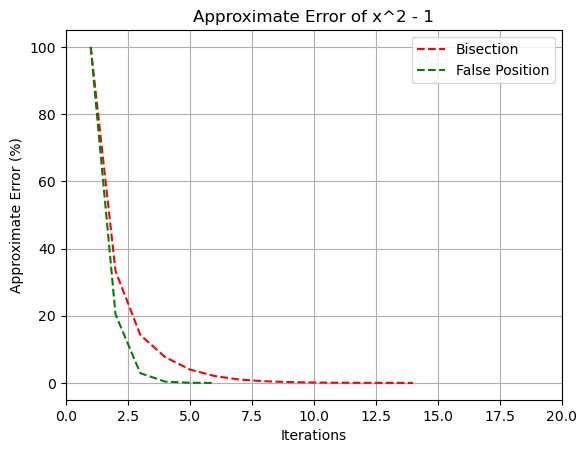

In [6]:
using PyPlot

plot(1:iter_bi, ea_all_bi, "r--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "g--", label="False Position")

xlabel("Iterations")
ylabel("Approximate Error (%)")

ax = gca()
ax[:set_xlim]([0, 20])

title("Approximate Error of x^2 - 1")

legend(loc="best")
grid(true)

In [7]:
function test_2(x)
    return x ^ 10 - 1
end

test_2 (generic function with 1 method)

In [8]:
(xr_bi, iter_bi, xr_all, xl_all, xu_all_bi, ea_all_bi) = bisect(test_2, 0, 1.3, 0.01, 10000)
println("xr = ", xr_bi)
println("iter = ", iter_bi)

xr = 0.9999938964843751
iter = 14


In [9]:
(xr_fp, iter_fp, xr_all, xl_all, xu_all_fp, ea_all_fp) = false_position(test_2, 0, 1.3, 0.01, 10000)
println("xr = ", xr_fp)
println("iter = ", iter_fp)

xr = 0.9996886513360608
iter = 39


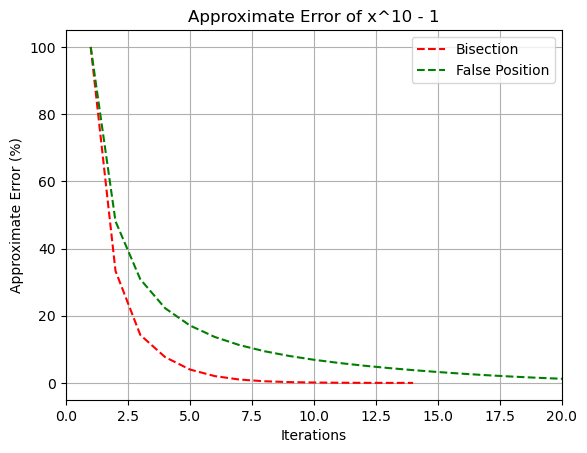

In [10]:
using PyPlot

plot(1:iter_bi, ea_all_bi, "r--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "g--", label="False Position")

xlabel("Iterations")
ylabel("Approximate Error (%)")

ax = gca()
ax[:set_xlim]([0, 20])

title("Approximate Error of x^10 - 1")

legend(loc="best")
grid(true)

In [11]:
function newton_raphson(f, f_diff, xi, es, imax)
    iter = 0
    ea = 100

    xi_all = []
    ea_all = []

    while ea > es && iter < imax
        xiold = xi
        xi = xi - f(xi) / f_diff(xi)
        iter += 1

        if xi != 0
            ea = abs((xi - xiold) / xi) * 100
        elseif f(xi) == 0
            ea = 0
        end

        append!(xi_all, xi)
        append!(ea_all, ea)
    end

    return xi, iter, xi_all, ea_all
end

newton_raphson (generic function with 1 method)

In [12]:
function test_3(x)
    return exp(-x) - x
end

test_3 (generic function with 1 method)

In [13]:
function test_3_diff(x)
    return -exp(-x) - 1
end

test_3_diff (generic function with 1 method)

In [14]:
(xi_nr, iter_nr, xi_all, ea_all_nr) = newton_raphson(test_3, test_3_diff, 0, 0.01, 10000)
println("xi = ", xi_nr)
println("iter = ", iter_nr)

xi = 0.5671432904097811
iter = 4


In [15]:
function secant(f, xi, ximinus1, es, imax)
    iter = 0
    ea = 100

    xi_all = []
    ea_all = []

    while ea > es && iter < imax
        xinext = xi - f(xi) * (xi - ximinus1) / (f(xi) - f(ximinus1))
        iter += 1

        ximinus1, xi = xi, xinext

        if xi != 0
            ea = abs((xi - ximinus1) / xi) * 100
        elseif f(xi) == 0
            ea = 0
        end

        append!(xi_all, xi)
        append!(ea_all, ea)
    end
    
    return xi, iter, xi_all, ea_all
end

secant (generic function with 1 method)

In [16]:
(xi_sec, iter_sec, xi_all, ea_all_sec) = secant(test_3, 0, -1, 0.01, 10000)
println("xi = ", xi_sec)
println("iter = ", iter_sec)

xi = 0.5671432898771658
iter = 5


In [17]:
(xr_bi, iter_bi, xr_all_bi, xl_all_bi, xu_all_bi, ea_all_bi) = bisect(test_3, 0, 1.3, 0.01, 10000)
println("xr = ", xr_bi)
println("iter = ", iter_bi)

xr = 0.5671234130859376
iter = 15


In [18]:
(xr_fp, iter_fp, xr_all_fp, xl_all_fp, xu_all_fp, ea_all_fp) = false_position(test_3, 0, 1.3, 0.01, 10000)
println("xr = ", xr_fp)
println("iter = ", iter_fp)

xr = 0.5671445370565966
iter = 6


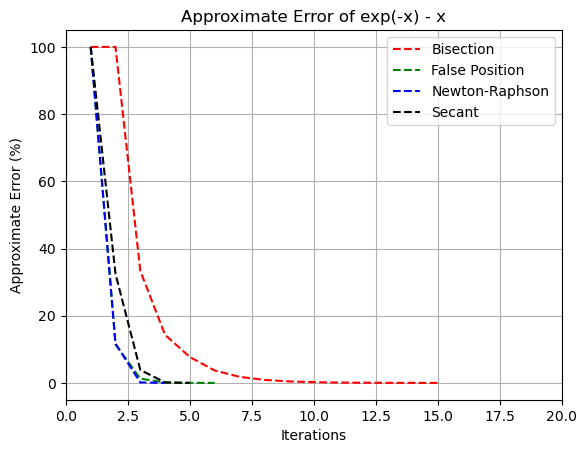

In [19]:
using PyPlot

plot(1:iter_bi, ea_all_bi, "r--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "g--", label="False Position") 
plot(1:iter_nr, ea_all_nr, "b--", label="Newton-Raphson")
plot(1:iter_sec, ea_all_sec, "k--", label="Secant")

xlabel("Iterations")
ylabel("Approximate Error (%)")

ax = gca()
ax[:set_xlim]([0, 20])

title("Approximate Error of exp(-x) - x")

legend(loc="best")
grid(true)

In [20]:
function task(x)
    # e^(-x) - x
    return exp(-x) - x
end

task (generic function with 1 method)

In [21]:
function task_diff(x)
     # Derivative of e^(-x) - x
    return -exp(-x) - 1
end

task_diff (generic function with 1 method)

In [22]:
(xr_bi, iter_bi, xr_all_bi, xl_all_bi, xu_all_bi, ea_all_bi) = bisect(task, 0, 1.3, 0.00001, 10000)
(xr_fp, iter_fp, xr_all_fp, xl_all_fp, xu_all_fp, ea_all_fp) = false_position(task, 0, 1.3, 0.00001, 10000)
(xi_nr, iter_nr, xi_all_nr, ea_all_nr) = newton_raphson(task, task_diff, 0, 0.00001, 10000)
(xi_sec, iter_sec, xi_all_sec, ea_all_sec) = secant(task, 0, -1, 0.00001, 10000)

println("Bisection: xr = ", xr_bi, ", iter = ", iter_bi)
println("False Position: xr = ", xr_fp, ", iter = ", iter_fp)
println("Newton-Raphson: xi = ", xi_nr, ", iter = ", iter_nr)
println("Secant: xi = ", xi_sec, ", iter = ", iter_sec)

Bisection: xr = 0.5671432882547379, iter = 25
False Position: xr = 0.5671432921242093, iter = 9
Newton-Raphson: xi = 0.567143290409784, iter = 5
Secant: xi = 0.5671432904097835, iter = 6


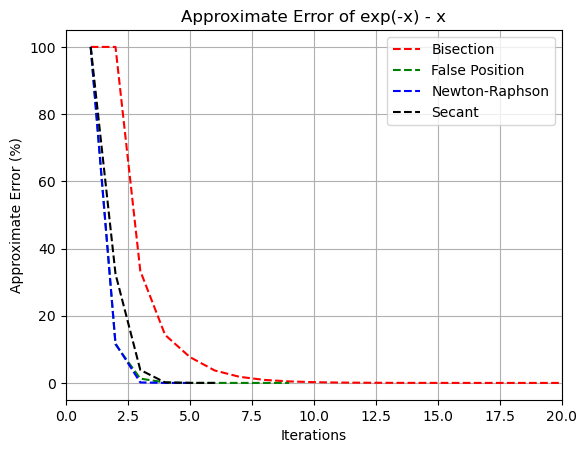

In [23]:
using PyPlot

plot(1:iter_bi, ea_all_bi, "r--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "g--", label="False Position")
plot(1:iter_nr, ea_all_nr, "b--", label="Newton-Raphson")
plot(1:iter_sec, ea_all_sec, "k--", label="Secant")

xlabel("Iterations")
ylabel("Approximate Error (%)")

ax = gca()
ax[:set_xlim]([0, 20])

title("Approximate Error of exp(-x) - x")

legend(loc="best")
grid(true)

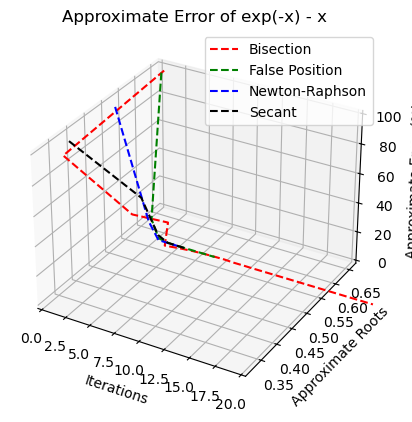

In [30]:
using PyPlot

fig = figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot(1:iter_bi, xr_all_bi, ea_all_bi, "r--", label="Bisection")
ax.plot(1:iter_fp, xr_all_fp, ea_all_fp, "g--", label="False Position")
ax.plot(1:iter_nr, xi_all_nr, ea_all_nr, "b--", label="Newton-Raphson")
ax.plot(1:iter_sec, xi_all_sec, ea_all_sec, "k--", label="Secant")

ax.set_xlabel("Iterations")
ax.set_ylabel("Approximate Roots")
ax.set_zlabel("Approximate Error (%)")

ax.set_xlim([0, 20])
ax.set_title("Approximate Error of exp(-x) - x")

ax.legend(loc="best")
plt.show()
